In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("retail.csv")


# data cleaning

In [74]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
total_sales = df['Total Amount'].sum()
print(f"Total Sales: {total_sales}")
print(df.isnull().sum())

df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop_duplicates()
df=df.set_index("Transaction ID")
df

Total Sales: 456000
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Transaction ID,,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...
996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
998,2023-10-29,CUST998,Female,23,Beauty,4,25,100


# Monthly sales Trend

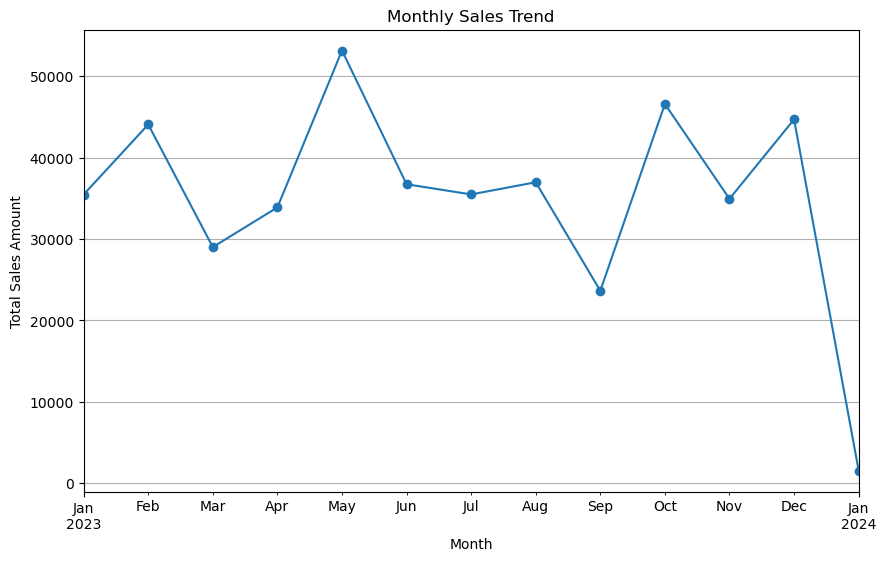

In [61]:
monthly_sales = df.resample('M', on='Date').sum()['Total Amount']
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)

plt.show()

# Top selling products

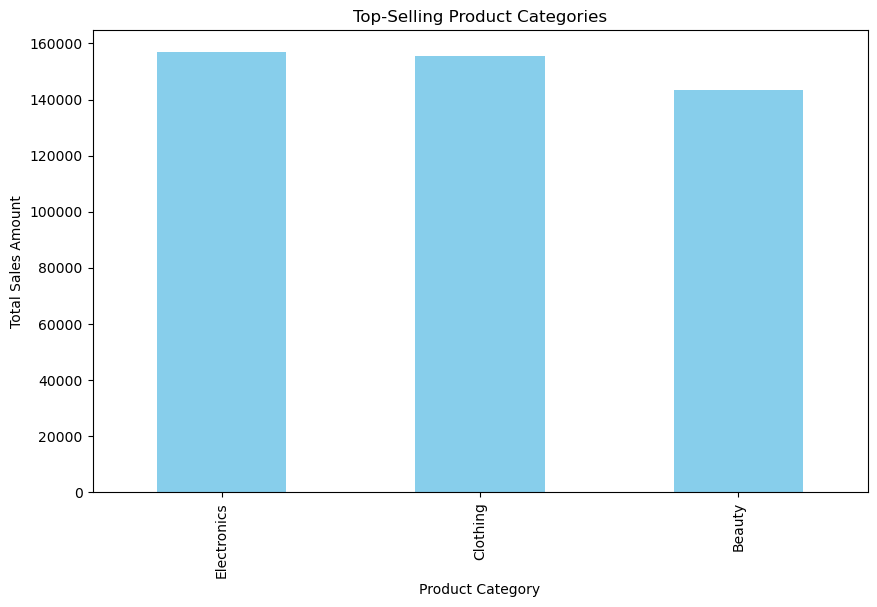

In [40]:
# Group by 'Product Category' and sum only the numeric columns, specifically 'Total Amount'
top_selling = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_selling.plot(kind='bar', color='skyblue')
plt.title('Top-Selling Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()


# customer Analysis

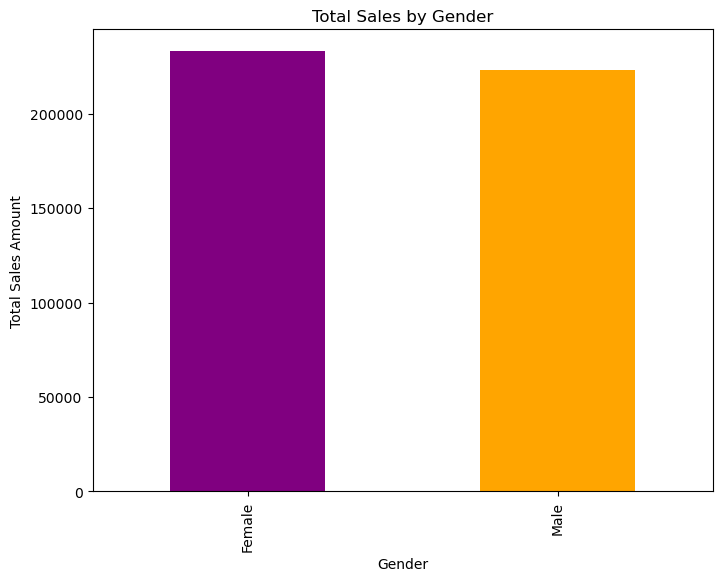

In [67]:
gender_segment = df.groupby('Gender').sum(numeric_only=True)['Total Amount']

# Plot Customer Segmentation by Gender
plt.figure(figsize=(8, 6))
gender_segment.plot(kind='bar', color=['purple', 'orange'])
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.show()


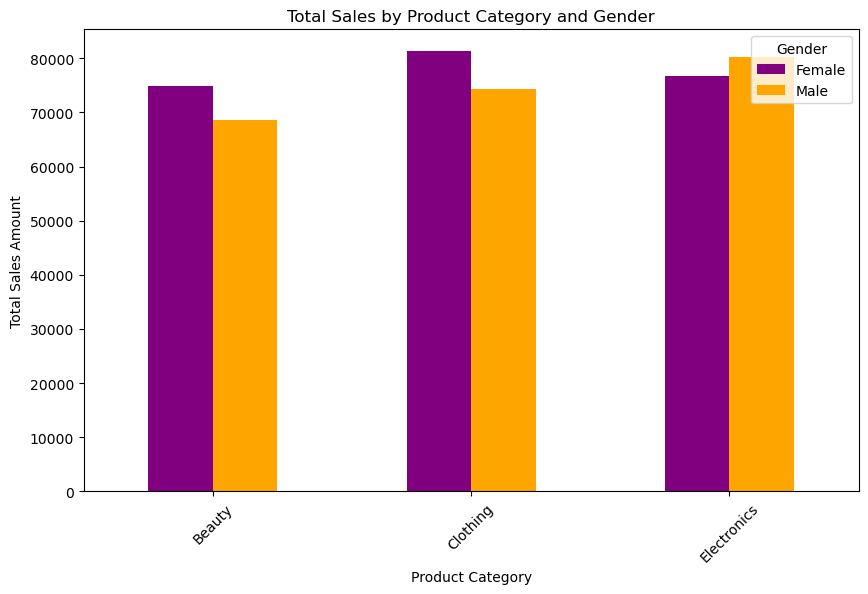

In [68]:

category_gender_segment = df.groupby(['Product Category', 'Gender']).sum(numeric_only=True)['Total Amount']

category_gender_segment = category_gender_segment.unstack()

plt.figure(figsize=(10, 6))
category_gender_segment.plot(kind='bar', color=['purple', 'orange'], ax=plt.gca())
plt.title('Total Sales by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()
